In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [127]:
df = pd.read_csv("/Users/shubhamghag/Documents/Data Science Projects/Datasets/the_movies_dataset_cleaned.csv", index_col="rank")

In [130]:
df.head()

,release_date,movie_title,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
rank,,,,,
1,"Dec 9, 2022",Avatar: The Way of Water,460000000.0,684075767.0,2.319592e+09
2,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.788912e+09
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09
4,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09
5,"May 17, 2023",Fast X,340000000.0,145960660.0,7.145289e+08


In [131]:
df.describe()

,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,6.018000e+03,6.018000e+03,6.018000e+03
mean,3.410330e+07,4.481723e+07,9.965057e+07
std,4.438923e+07,7.349855e+07,1.906939e+08
min,1.100000e+03,0.000000e+00,1.700000e+01
25%,6.000000e+06,2.673812e+06,6.626766e+06
50%,1.850000e+07,1.907176e+07,3.235482e+07
75%,4.200000e+07,5.479224e+07,1.041023e+08
max,4.600000e+08,9.366622e+08,2.923706e+09


In [132]:
df.isnull().sum()

release_date             0
movie_title              0
production_budget_usd    0
domestic_gross_usd       0
worldwide_gross_usd      0
dtype: int64

In [133]:
df.shape

(6018, 5)

In [134]:
df.columns

Index(['release_date', 'movie_title', 'production_budget_usd',
       'domestic_gross_usd', 'worldwide_gross_usd'],
      dtype='object')

In [135]:
df.dtypes

release_date              object
movie_title               object
production_budget_usd    float64
domestic_gross_usd       float64
worldwide_gross_usd      float64
dtype: object

### Top 50 highest grossing movies worldwide

In [159]:

unique_colors = px.colors.qualitative.Set1[:len(df_subset['movie_title'].unique())]

df_subset = df.head(50)

fig = px.scatter(df_subset, x='production_budget_usd', y='worldwide_gross_usd', text='movie_title', color='movie_title',
                 color_discrete_sequence=unique_colors, size_max=100)

fig.update_layout(
    title='Top 100 Movies by Worldwide Gross vs. Production Budget',
    xaxis_title='Production Budget (in USD)',
    yaxis_title='Worldwide Gross (in USD)',
    showlegend=True,
    legend_title='Movie Titles',
    autosize=False,
    width=1000,  
    height=800,  
    xaxis_range=[0, 300000000],  
    yaxis_range=[0, 3000000000],  
)

fig.update_traces(marker=dict(size=10, line=dict(width=2, color='Black')),
                  selector=dict(mode='markers+text'))

fig.update_traces(textposition='bottom center')
fig.update_layout(font=dict(family="Arial", size=10))
fig.show()




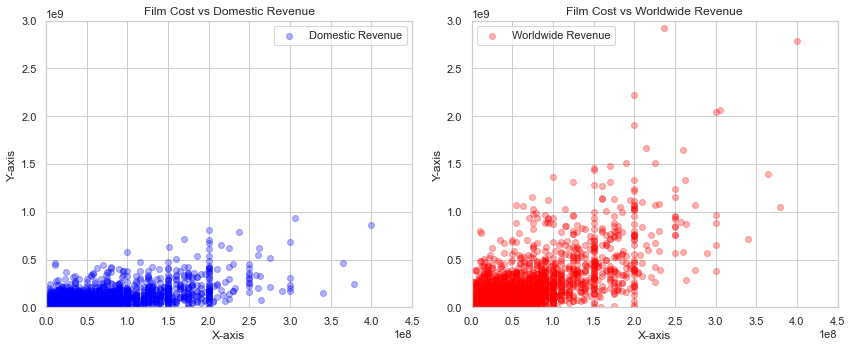

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(df['production_budget_usd'], df['domestic_gross_usd'], c='blue', label='Domestic Revenue',alpha=0.3)
axes[0].set_title('Film Cost vs Domestic Revenue')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[0].set_ylim(0, 3000000000)
axes[0].set_xlim(0, 450000000)
axes[0].legend()

axes[1].scatter(df['production_budget_usd'], df['worldwide_gross_usd'], c='red', label='Worldwide Revenue',alpha=0.3)
axes[1].set_title('Film Cost vs Worldwide Revenue')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
axes[1].set_ylim(0, 3000000000)
axes[1].set_xlim(0, 450000000)
axes[1].legend()

plt.tight_layout()

plt.show()

In [117]:
x = df['production_budget_usd']
y = df['worldwide_gross_usd']

X = production_budget.values.reshape(-1, 1)

regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Slope Coefficent:

In [118]:
regression.coef_

array([3.16552324])

There is a positive relationship between the budget and the revenue of the movies produced. Statistically speaking, for each dollar spent in the the production budget of the movie, there are three dollars worth of revenue earned.

Intercept Coefficent:

In [119]:
regression.intercept_

-8304233.831049278

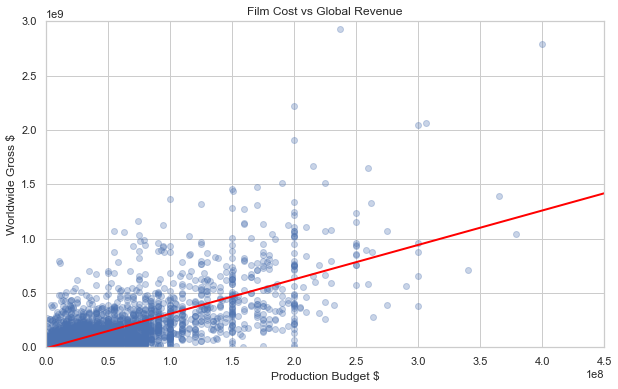

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color='red', linewidth=2)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [121]:
regression.score(X,y)

0.5429659045963755

Questions:

1: How would our model do if we added more features (runtime, production time, sequel etc)?

2:What if the data is non-linear? 